In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/DrinkingWater_Final_Dataset.csv')
df['Time'] = pd.to_datetime(df['Time'])

# df.dtypes

df2 = df[['Time', 'WQI']].copy()

df2 = df2.set_index('Time')


In [ ]:
# df3

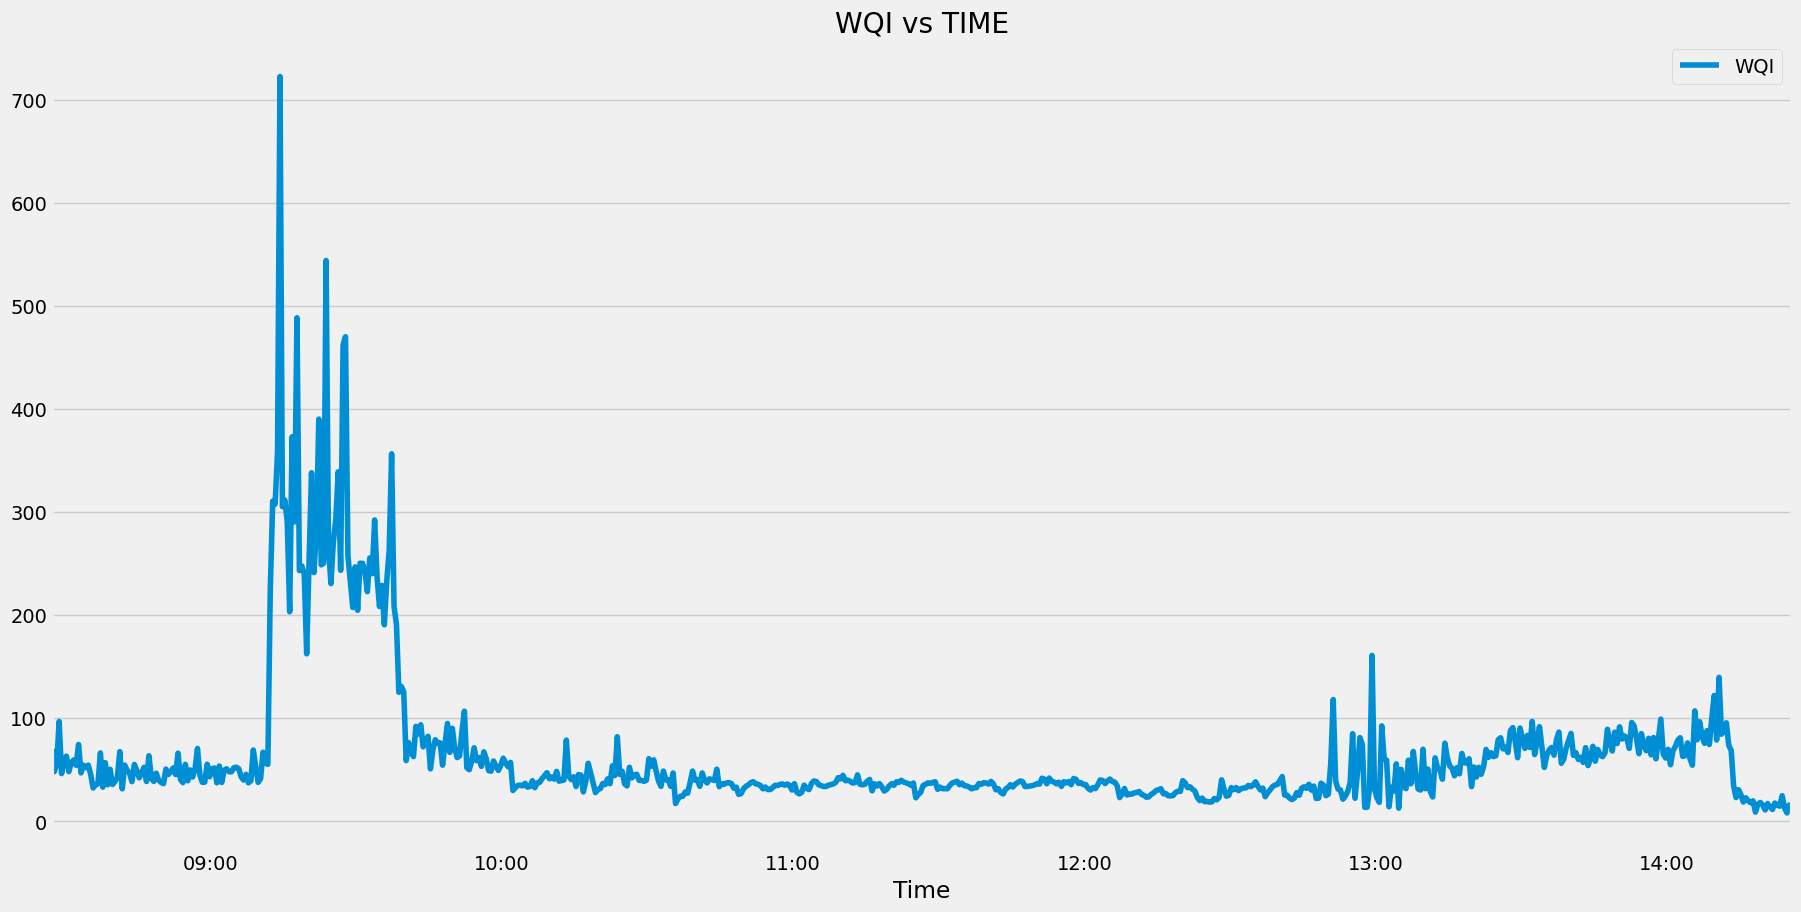

In [ ]:
df2.plot(
        figsize=(20, 10),
        color=color_pal[0],
        title='WQI vs TIME')
plt.show()

**Train / Test Split**

                       WQI
Time                      
2023-04-15 08:27:17  70.51
2023-04-15 08:27:47  48.31
2023-04-15 08:28:17  55.70
2023-04-15 08:28:47  97.02
2023-04-15 08:29:17  46.45
...                    ...
2023-04-15 13:34:47  52.42
2023-04-15 13:35:17  64.12
2023-04-15 13:35:47  69.37
2023-04-15 13:36:17  71.76
2023-04-15 13:36:47  64.34

[620 rows x 1 columns]


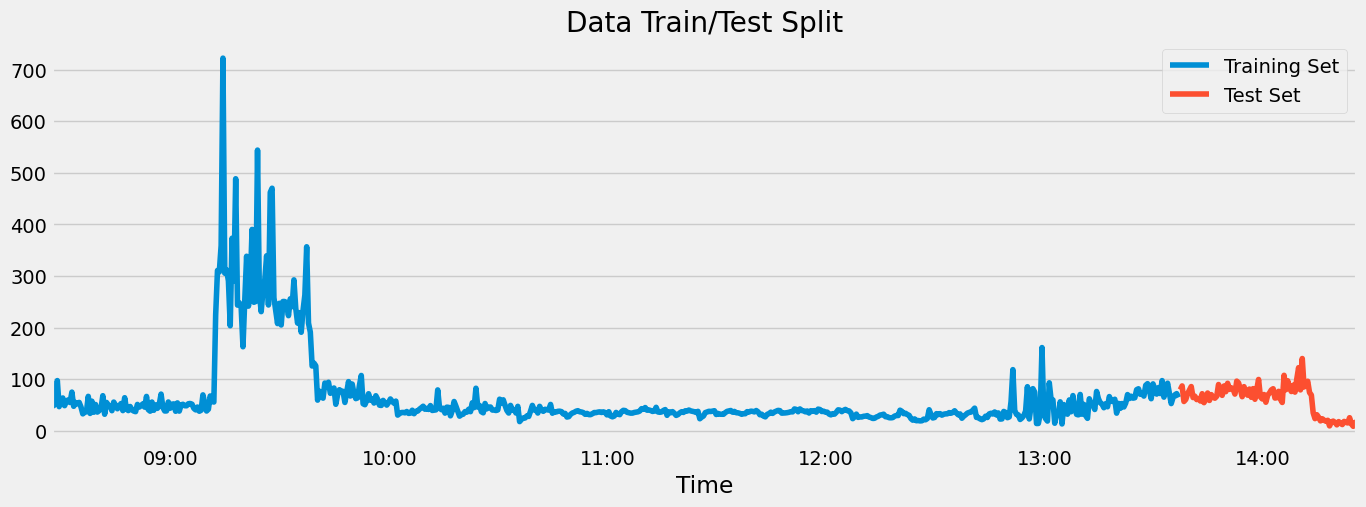

In [ ]:
train = df2.loc[df2.index < '13:37:17']
test = df2.loc[df2.index >= '13:37:17']
print(train)


fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('13:37:17', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [ ]:
print(train)
print(test)

                       WQI
Time                      
2023-04-15 08:27:17  70.51
2023-04-15 08:27:47  48.31
2023-04-15 08:28:17  55.70
2023-04-15 08:28:47  97.02
2023-04-15 08:29:17  46.45
...                    ...
2023-04-15 13:34:47  52.42
2023-04-15 13:35:17  64.12
2023-04-15 13:35:47  69.37
2023-04-15 13:36:17  71.76
2023-04-15 13:36:47  64.34

[620 rows x 1 columns]
                       WQI
Time                      
2023-04-15 13:37:17  79.36
2023-04-15 13:37:47  86.67
2023-04-15 13:38:17  56.43
2023-04-15 13:38:47  60.46
2023-04-15 13:39:17  71.37
...                    ...
2023-04-15 14:23:47  25.01
2023-04-15 14:24:17  12.93
2023-04-15 14:24:47   8.30
2023-04-15 14:25:17  16.08
2023-04-15 14:25:47  13.81

[98 rows x 1 columns]


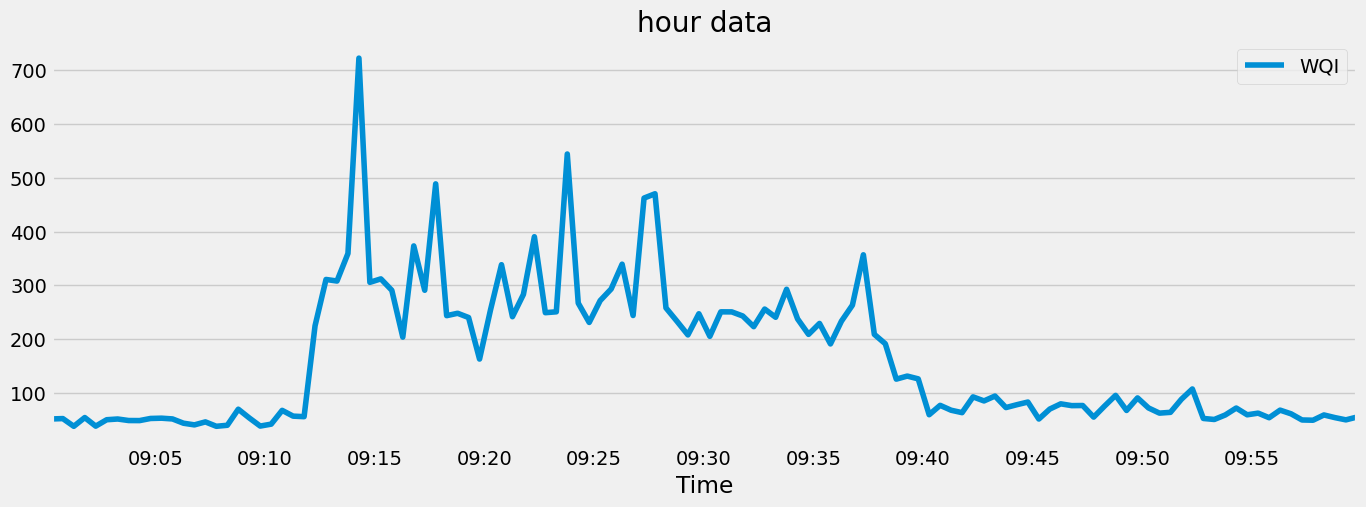

In [ ]:
df2.loc[(df2.index > '09:00:00') & (df2.index < '10:00:00')] \
    .plot(figsize=(15, 5), title='hour data')
plt.show()

In [ ]:
def create_features(df2):
    """
    Create time series features based on time series index.
    """
    df2 = df2.copy()
    df2['TIME'] = df2.index.hour
    return df2

df2 = create_features(df2)
# df2

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# sns.boxplot(data=df2, x='TIME', y="WQI")
# ax.set_title('MW by Hour')
# plt.show()

<BarContainer object of 718 artists>

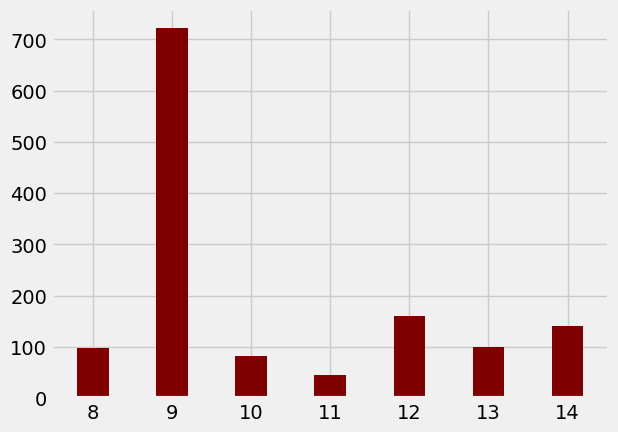

In [ ]:
plt.bar(df2['TIME'], df2['WQI'], color ='maroon',
        width = 0.4)

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['TIME']
TARGET = 'WQI'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[20:10:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:98.69338	validation_1-rmse:66.91447
[100]	validation_0-rmse:65.23269	validation_1-rmse:38.10354
[200]	validation_0-rmse:59.22320	validation_1-rmse:31.09549
[300]	validation_0-rmse:58.35563	validation_1-rmse:29.57646
[400]	validation_0-rmse:58.23626	validation_1-rmse:29.20023
[500]	validation_0-rmse:58.21994	validation_1-rmse:29.08800
[600]	validation_0-rmse:58.21771	validation_1-rmse:29.05019
[700]	validation_0-rmse:58.21740	validation_1-rmse:29.03669
[800]	validation_0-rmse:58.21736	validation_1-rmse:29.03176
[900]	validation_0-rmse:58.21735	validation_1-rmse:29.02994
[999]	validation_0-rmse:58.21735	validation_1-rmse:29.02927


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
# fi = pd.DataFrame(data=reg.feature_importances_,
#              index=reg.feature_names_in_,
#              columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

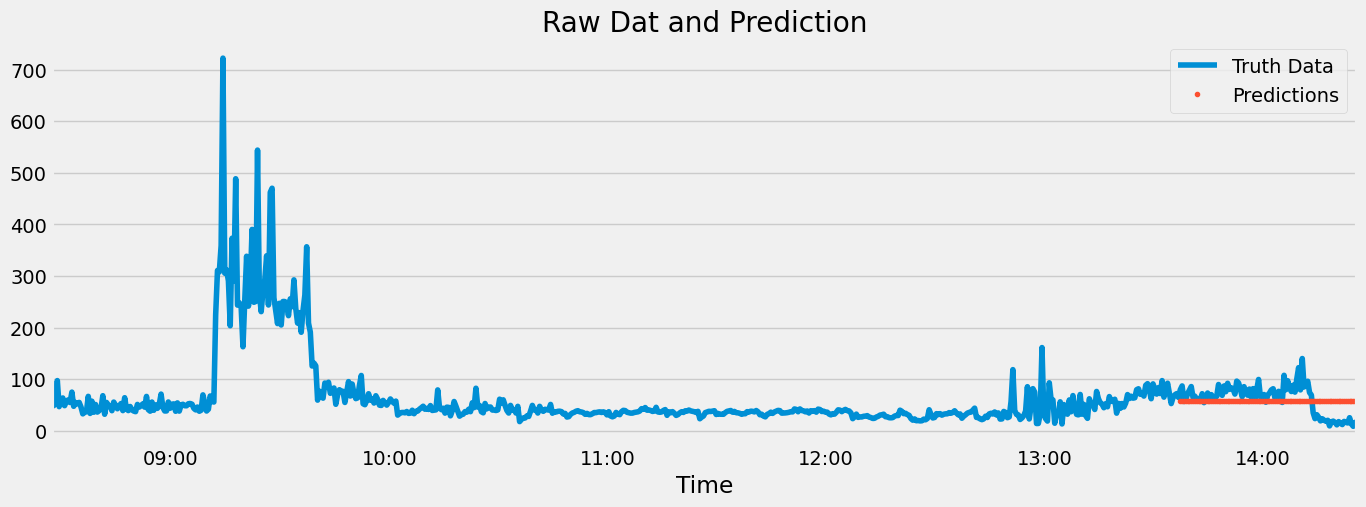

In [ ]:
test['prediction'] = reg.predict(X_test)
df2 = df2.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df2[['WQI']].plot(figsize=(15, 5))
df2['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

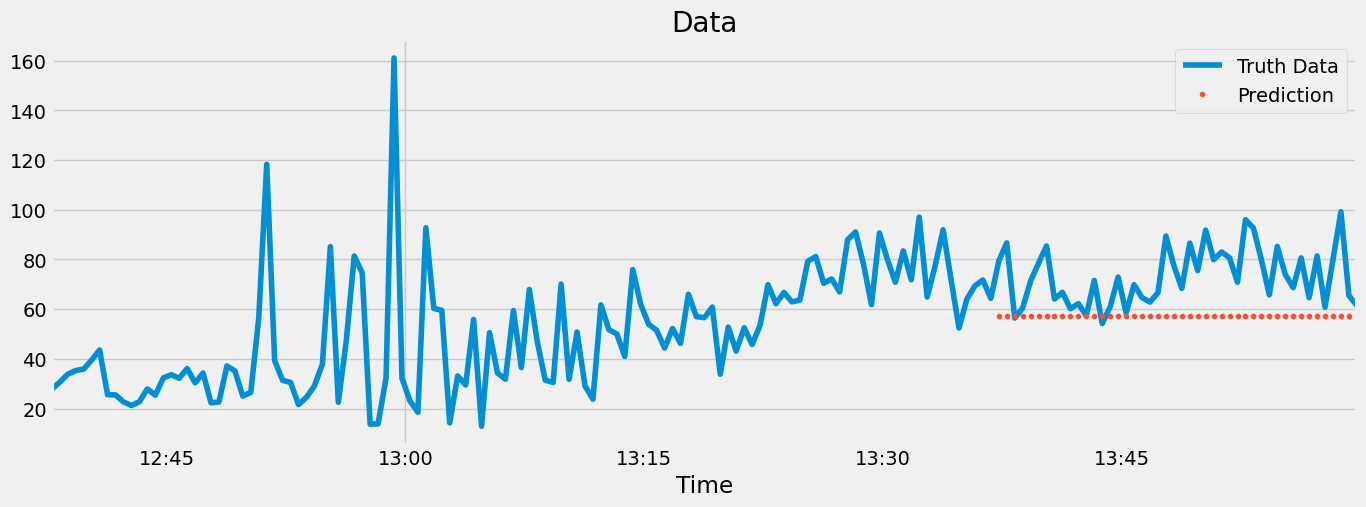

In [ ]:
ax = df2.loc[(df2.index > '12:37:17') & (df2.index < '14:00:00')]['WQI'] \
    .plot(figsize=(15, 5), title='Data')
df2.loc[(df2.index > '12:37:17') & (df2.index < '14:00:00')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test['WQI'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 29.03


In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2023-04-15    24.327046
Name: error, dtype: float64